In [0]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 35kB/s 
     |████████████████████████████████| 512kB 45.0MB/s 
     |████████████████████████████████| 3.8MB 45.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=5a8f9f43f53eead696bdfbbe860b5454c4afe70fb55ce4ac22714c0c2b7ecb86
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

1.15.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/walking/wlaking.csv")
data.head()
data.shape


(149332, 5)

In [0]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(data.duplicated())))


No of duplicates in DATA: 448


In [0]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))
data.shape

We have 0 NaN/Null values in data


(149332, 5)

In [0]:
data.head()

,TIMESTAMP,X,Y,Z,USER
0,0.000000,0.69464,3.17350,7.5048,user1
1,0.030639,0.14982,3.48680,9.2755,user1
2,0.069763,-0.29965,1.94770,9.1120,user1
3,0.099823,-1.68890,1.41650,10.1200,user1
4,0.129820,-2.17930,0.95342,10.9240,user1


In [0]:
data['USER'].value_counts()

user17    21991
user18    20758
user20    16949
user14    12027
user22     9698
user9      7988
user4      6981
user13     6699
user11     5636
user1      5069
user6      4936
user12     4799
user2      3882
user7      3729
user15     3653
user8      3457
user10     3086
user21     3082
user16     1728
user3      1144
user5      1129
user19      911
Name: USER, dtype: int64

In [0]:
data['X'] = data['X'].astype('float')
data['Y'] = data['Y'].astype('float')
data['Z'] = data['Z'].astype('float')
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149332 entries, 0 to 149331
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   TIMESTAMP  149332 non-null  float64
 1   X          149332 non-null  float64
 2   Y          149332 non-null  float64
 3   Z          149332 non-null  float64
 4   USER       149332 non-null  object 
dtypes: float64(4), object(1)
memory usage: 5.7+ MB


(149332, 5)

In [0]:
Fs = 20
gt= data['USER'].value_counts().index
gt

Index(['user17', 'user18', 'user20', 'user14', 'user22', 'user9', 'user4',
       'user13', 'user11', 'user1', 'user6', 'user12', 'user2', 'user7',
       'user15', 'user8', 'user10', 'user21', 'user16', 'user3', 'user5',
       'user19'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['label'] = label.fit_transform(data['USER'])
data.head()

,TIMESTAMP,X,Y,Z,USER,label
0,0.000000,0.69464,3.17350,7.5048,user1,0
1,0.030639,0.14982,3.48680,9.2755,user1,0
2,0.069763,-0.29965,1.94770,9.1120,user1,0
3,0.099823,-1.68890,1.41650,10.1200,user1,0
4,0.129820,-2.17930,0.95342,10.9240,user1,0


In [0]:
label.classes_

array(['user1', 'user10', 'user11', 'user12', 'user13', 'user14',
       'user15', 'user16', 'user17', 'user18', 'user19', 'user2',
       'user20', 'user21', 'user22', 'user3', 'user4', 'user5', 'user6',
       'user7', 'user8', 'user9'], dtype=object)

In [0]:
X = data[['X', 'Y', 'Z']]
y = data['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['X', 'Y', 'Z'])
scaled_X['label'] = y.values

scaled_X

,X,Y,Z,label
0,0.819672,-2.018554,2.207776,0
1,0.629638,-1.905540,2.770330,0
2,0.472862,-2.460726,2.718386,0
3,-0.011710,-2.652341,3.038629,0
4,-0.182762,-2.819384,3.294061,0
...,...,...,...,...
149327,0.178317,-0.967124,2.194814,14
149328,0.377849,-1.202964,2.623203,14
149329,0.311336,-1.035914,2.415490,14
149330,0.202070,-1.104703,2.099599,14


In [0]:
Fs = 50
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40


In [0]:
import math as m
def get_frames(data, frame_size):

  N_FEATURES = 3
  frames = []
  labels = []
  for i in range(0, len(scaled_X)- frame_size):
    x = data['X'].values[i: i + frame_size]
    y = data['Y'].values[i: i + frame_size]
    z = data['Z'].values[i: i + frame_size]
        # Retrieve the most often used label in this segment
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x, y, z])
    labels.append(label)
  # Bring the segments into a better shape
  frames = np.asarray(frames, dtype= np.float32).reshape(-1, frame_size, N_FEATURES)
  labels = np.asarray(labels)
  return frames, labels


In [0]:
X,y = get_frames(scaled_X, frame_size)

In [0]:
X.shape
#y.shape

(149132, 200, 3)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)


In [0]:
X_train.shape, X_test.shape

((119305, 200, 3), (29827, 200, 3))

In [0]:
X_train = X_train.reshape(119305, 200, 3,1)
X_test = X_test.reshape(29827, 200, 3,1)
X_train[0].shape, X_test[0].shape

((200, 3, 1), (200, 3, 1))

In [0]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(22, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 3, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 3, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 1, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1639424   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
______________________________________

In [0]:
from keras import optimizers
sgd = optimizers.adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
import time
start_time = time.time()
history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=64, verbose=1)
print("--- %s seconds ---" % (time.time() - start_time))
print("complete !!!")


Train on 119305 samples, validate on 29827 samples
Epoch 1/30
119305/119305 [==============================] - 16s 133us/step - loss: 1.0989 - accuracy: 0.6574 - val_loss: 0.5854 - val_accuracy: 0.8514
Epoch 2/30
119305/119305 [==============================] - 9s 78us/step - loss: 0.4636 - accuracy: 0.8520 - val_loss: 0.3333 - val_accuracy: 0.9222
Epoch 3/30
119305/119305 [==============================] - 9s 76us/step - loss: 0.2949 - accuracy: 0.9065 - val_loss: 0.2264 - val_accuracy: 0.9537
Epoch 4/30
119305/119305 [==============================] - 9s 77us/step - loss: 0.2081 - accuracy: 0.9345 - val_loss: 0.1613 - val_accuracy: 0.9691
Epoch 5/30
119305/119305 [==============================] - 9s 78us/step - loss: 0.1536 - accuracy: 0.9524 - val_loss: 0.1217 - val_accuracy: 0.9789
Epoch 6/30
119305/119305 [==============================] - 9s 77us/step - loss: 0.1192 - accuracy: 0.9632 - val_loss: 0.0906 - val_accuracy: 0.9844
Epoch 7/30
119305/119305 [==========================

[[ 994    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0  616    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0 1127    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    1  959    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0 1340    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    1 2405    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  731    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  344    2    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 4398    0    0    0    0    0
     0  

(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9de01aca20>)

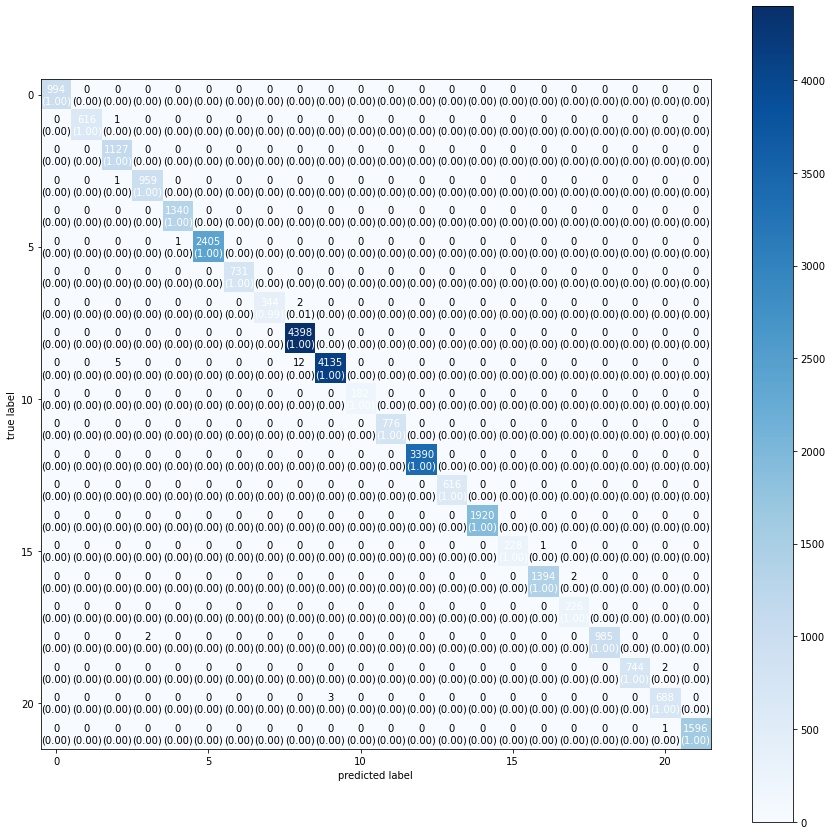

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
mat = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(conf_mat=mat, show_normed=True,cmap=plt.cm.Blues,show_absolute=True, figsize=(15,15),colorbar=True)

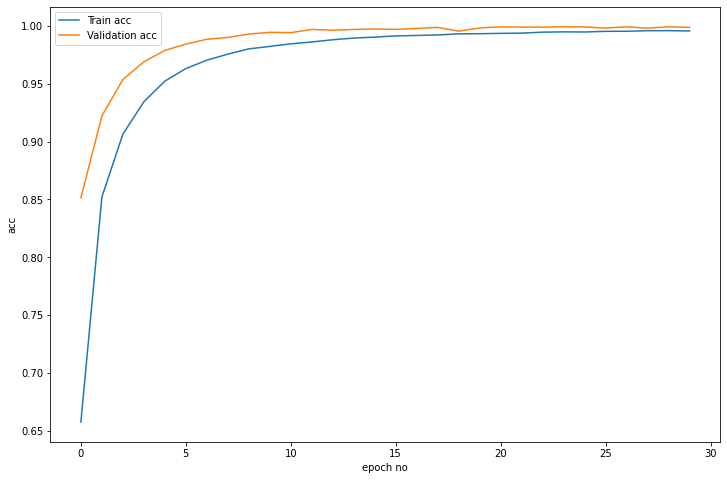

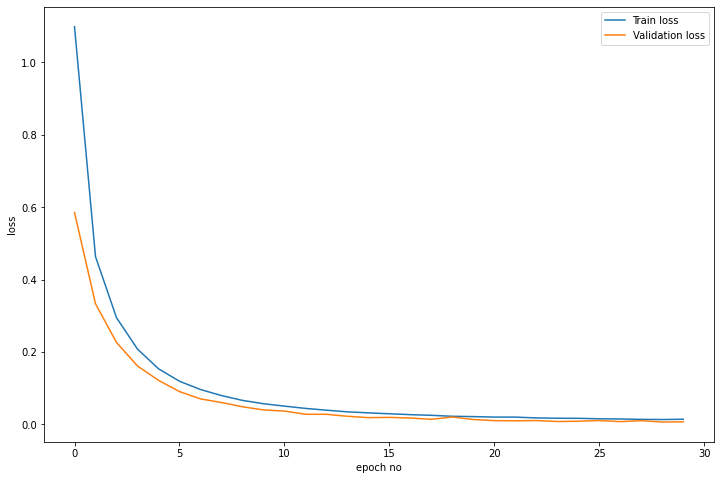

In [0]:
import matplotlib.pyplot as plt1

# Plot training & validation accuracy values
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],label='Train acc')
plt.plot(history.history['val_accuracy'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
history.history['accuracy']

[0.65740746,
 0.8520431,
 0.906475,
 0.9344872,
 0.9523574,
 0.9631868,
 0.9705209,
 0.9757009,
 0.9802774,
 0.98240644,
 0.98462766,
 0.9862202,
 0.9881732,
 0.9895981,
 0.99045306,
 0.99146724,
 0.9918612,
 0.9922803,
 0.99328613,
 0.9933867,
 0.99368846,
 0.9939064,
 0.9947278,
 0.9949876,
 0.99485356,
 0.995457,
 0.9955157,
 0.9959767,
 0.9960354,
 0.99575037]

In [0]:
history.history['val_accuracy']

[0.8514097929000854,
 0.9221845865249634,
 0.9537332057952881,
 0.9690548777580261,
 0.978945255279541,
 0.9843765497207642,
 0.9886009097099304,
 0.9901431798934937,
 0.9930934906005859,
 0.9946022033691406,
 0.9943004846572876,
 0.9970831871032715,
 0.9964126348495483,
 0.9970831871032715,
 0.9974855184555054,
 0.9971166849136353,
 0.9979884028434753,
 0.9988601207733154,
 0.9956080317497253,
 0.9983907341957092,
 0.9993630051612854,
 0.9990612268447876,
 0.9990947842597961,
 0.9994635581970215,
 0.9991953372955322,
 0.9982901215553284,
 0.9993630051612854,
 0.9981560111045837,
 0.9993965029716492,
 0.9988936185836792]

In [0]:
history.history['loss']

[1.0989370930445155,
 0.4636032994667486,
 0.29485684562917724,
 0.20810918893764527,
 0.1536274496307767,
 0.11917600458901052,
 0.09632846452999902,
 0.0795648324995937,
 0.06626476464895895,
 0.05699144357583618,
 0.0503819875245217,
 0.04416113010543785,
 0.03915182162508856,
 0.034607218496171356,
 0.03182351004478593,
 0.029226313081048436,
 0.02682961067176902,
 0.024966603484590046,
 0.022328173435762804,
 0.021435899825499007,
 0.020119914507959063,
 0.02004323299639667,
 0.017801878053602775,
 0.016846262091579915,
 0.016698944109912486,
 0.015347872272604231,
 0.014892407019810091,
 0.013775953760017823,
 0.01337428597829756,
 0.014096265412980416]

In [0]:
history.history['val_loss']

[0.5854361059989251,
 0.3333272102753236,
 0.22640475057359993,
 0.16132072794588084,
 0.12172709411142474,
 0.09058255269165774,
 0.07040726183834807,
 0.06036926194929024,
 0.0486377292807678,
 0.03989695949259433,
 0.03671444766760486,
 0.027918866777551336,
 0.027783758102816858,
 0.02234584704996565,
 0.018597840925565393,
 0.01925626141591348,
 0.01747527820014672,
 0.014002711648254429,
 0.020205349304361755,
 0.013456451096718267,
 0.010272843012260318,
 0.009837532228609967,
 0.010486350272293082,
 0.007904511578338597,
 0.008620167009944736,
 0.01054714060543908,
 0.007572921398259869,
 0.010251856580668009,
 0.006430847163650498,
 0.00706173690536634]

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

fruits = [64,128,256,512,1024]
for x in fruits:
  print(x)
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(22, activation='softmax'))
  model.summary()
  sgd = optimizers.adam(lr=0.0001)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=x, verbose=1)  
  y_pred = model.predict_classes(X_test)
  mat = confusion_matrix(y_test, y_pred)
  print(confusion_matrix(y_test, y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))



64
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 3, 16)        160       
_________________________________________________________________
dropout_3 (Dropout)          (None, 200, 3, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 1, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1639424   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 22)            

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

fruits = [0.0001,0.001,0.01,0.1,1.0]
for x in fruits:
  print(x)
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(22, activation='softmax'))
  model.summary() 
  sgd = optimizers.adam(lr=x)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=64, verbose=1)  
  y_pred = model.predict_classes(X_test)
  mat = confusion_matrix(y_test, y_pred)
  print(confusion_matrix(y_test, y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))

0.0001
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 200, 3, 16)        160       
_________________________________________________________________
dropout_13 (Dropout)         (None, 200, 3, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 100, 1, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1639424   
_________________________________________________________________
dropout_14 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 22)        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train on 119305 samples, validate on 29827 samples
Epoch 1/30
119305/119305 [==============================] - 10s 85us/step - loss: 933.1135 - accuracy: 0.1425 - val_loss: 5.8697 - val_accuracy: 0.1473
Epoch 2/30
119305/119305 [==============================] - 10s 83us/step - loss: 41.9261 - accuracy: 0.1364 - val_loss: 3.3319 - val_accuracy: 0.1392
Epoch 3/30
119305/119305 [==============================] - 10s 82us/step - loss: 4.7095 - accuracy: 0.1360 - val_loss: 2.9581 - val_accuracy: 0.1138
Epoch 4/30
119305/119305 [==============================] - 10s 81us/step - loss: 71.8655 - accuracy: 0.1368 - val_loss: 3.9189 - val_accuracy: 0.1482
Epoch 5/30
119305/119305 [==============================] - 10s 82us/step - loss: 22.0594 - accuracy: 0.1448 - val_loss: 2.8846 - val_accuracy: 0.1229
Epoch 6/30
119305/119305 [==============================] - 10s 83us/step - loss: 3.0050 - accuracy: 0.1445 - val_loss: 2.8261 - val_accuracy: 0.1229
Epoch 7/30
119305/119305 [==================

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
